<a href="https://colab.research.google.com/github/Huni1i1/Run-Way/blob/main/Run_Way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Check the gpu
!nvidia-smi

Sun Dec  1 06:24:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Install Detectron2
!pip3 install -q torch
!pip3 install -q torchvision
!pip3 install pyyaml
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-mg511lj9
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-mg511lj9
  Resolved https://github.com/facebookresearch/detectron2.git to commit c69939aa85460e8135f40bce908a6cddaa73065f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 63.3 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [ ]:
# Check the version
import torch, detectron2, os
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.5 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# Clone VideoPose3D
import os

os.chdir('/content')
!git clone https://github.com/facebookresearch/VideoPose3D

Cloning into 'VideoPose3D'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121 (from 1)
Receiving objects: 100% (121/121), 9.53 MiB | 14.90 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
# Change infer_video_d2.py and run.py
import shutil

os.chdir('/content')
!git clone https://github.com/Huni1i1/RPC_requirements
shutil.move('/content/RPC_requirements/infer_video_d2.py', '/content/VideoPose3D/inference/infer_video_d2.py')
shutil.move('/content/RPC_requirements/run.py', '/content/VideoPose3D/run.py')

Cloning into 'RPC_requirements'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 117 (delta 19), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (117/117), 1.11 MiB | 4.95 MiB/s, done.
Resolving deltas: 100% (19/19), done.


'/content/VideoPose3D/run.py'

In [ ]:
# Download pre-trained model
os.makedirs('/content/VideoPose3D/checkpoint', exist_ok = True)
!wget https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin -P /content/VideoPose3D/checkpoint

--2024-12-01 06:30:08--  https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.33, 13.227.219.59, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67892577 (65M) [application/octet-stream]
Saving to: ‘/content/VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin’

pretrained_h36m_det 100%[===================>]  64.75M  19.5MB/s    in 3.3s    

2024-12-01 06:30:12 (19.5 MB/s) - ‘/content/VideoPose3D/checkpoint/pretrained_h36m_detectron_coco.bin’ saved [67892577/67892577]



In [ ]:
# Install Scikit-Learn
!pip install scikit-learn

# Dataset

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.makedirs('/content/drive/MyDrive/CapstoneDesign/train/videos', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/train/Det2', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/train/VP3D_joint', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/train/VP3D_render', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/train/angles', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/train/labels', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/train/checkpoint', exist_ok = True)

In [ ]:
ORIGINAL_VIDEOS = '/content/drive/MyDrive/CapstoneDesign/train/original_videos'

VIDEOS = '/content/drive/MyDrive/CapstoneDesign/train/videos'
DET2 = '/content/drive/MyDrive/CapstoneDesign/train/Det2'
VP3D_JOINT = '/content/drive/MyDrive/CapstoneDesign/train/VP3D_joint'
VP3D_RENDER = '/content/drive/MyDrive/CapstoneDesign/train/VP3D_render'
ANGLES = '/content/drive/MyDrive/CapstoneDesign/train/angles'
LABELS = '/content/drive/MyDrive/CapstoneDesign/train/labels'
CHECKPOINT = '/content/drive/MyDrive/CapstoneDesign/train/checkpoint'

In [ ]:
# # Crop videos to square
# import os
# import glob
# import subprocess

# def crop_video_to_square(input_folder, output_folder):
#     video_files = sorted(glob.glob(os.path.join(input_folder, '*.mp4')))

#     for input_video_path in video_files:
#         output_video_path = os.path.join(output_folder, os.path.basename(input_video_path))

#         print(f"Cropping video: {input_video_path} -> {output_video_path}")

#         command = [
#         'ffmpeg', '-i', input_video_path,
#         '-vf', 'crop=min(in_w\,in_h):min(in_w\,in_h)',
#         '-c:a', 'copy',
#         output_video_path
#         ]

#         subprocess.run(command)

#     print(f"All videos have been cropped and saved in {output_folder}.")

# crop_video_to_square(ORIGINAL_VIDEOS, VIDEOS)

Cropping video: /content/drive/MyDrive/dataset/original_videos/1_0.mp4 -> /content/data/videos/1_0.mp4
Cropping video: /content/drive/MyDrive/dataset/original_videos/1_1.mp4 -> /content/data/videos/1_1.mp4
Cropping video: /content/drive/MyDrive/dataset/original_videos/2_0.mp4 -> /content/data/videos/2_0.mp4
Cropping video: /content/drive/MyDrive/dataset/original_videos/2_1.mp4 -> /content/data/videos/2_1.mp4
All videos have been cropped and saved in 'VIDEOS'.


In [ ]:
# Resample videos to 50fps
import os
import glob
import subprocess

def resample_videos_to_50fps(input_folder, output_folder):
    video_files = sorted(glob.glob(os.path.join(input_folder, '*.mp4')))

    for input_video_path in video_files:
        output_video_path = os.path.join(output_folder, os.path.basename(input_video_path))

        print(f"Resample video to 50fps: {input_video_path} -> {output_video_path}")

        command = [
            "ffmpeg",
            "-i", input_video_path,
            "-filter:v", "fps=fps=50",
            "-c:a", "copy",
            output_video_path
        ]

        subprocess.run(command, check=True)

    print(f"All videos have been resampled and saved in {output_folder}.")

resample_videos_to_50fps(ORIGINAL_VIDEOS, VIDEOS)

Resample video to 50fps: /content/drive/MyDrive/CapstoneDesign/train/original_videos/0_00.mp4 -> /content/drive/MyDrive/CapstoneDesign/train/videos/0_00.mp4
Resample video to 50fps: /content/drive/MyDrive/CapstoneDesign/train/original_videos/0_01.mp4 -> /content/drive/MyDrive/CapstoneDesign/train/videos/0_01.mp4
Resample video to 50fps: /content/drive/MyDrive/CapstoneDesign/train/original_videos/0_02.mp4 -> /content/drive/MyDrive/CapstoneDesign/train/videos/0_02.mp4
Resample video to 50fps: /content/drive/MyDrive/CapstoneDesign/train/original_videos/0_03.mp4 -> /content/drive/MyDrive/CapstoneDesign/train/videos/0_03.mp4
Resample video to 50fps: /content/drive/MyDrive/CapstoneDesign/train/original_videos/0_04.mp4 -> /content/drive/MyDrive/CapstoneDesign/train/videos/0_04.mp4
Resample video to 50fps: /content/drive/MyDrive/CapstoneDesign/train/original_videos/0_05.mp4 -> /content/drive/MyDrive/CapstoneDesign/train/videos/0_05.mp4
Resample video to 50fps: /content/drive/MyDrive/CapstoneDe

# Infer 2D Keypoints

In [ ]:
# Infer 2D keypoints with Detectron2 and prepare custom dataset
def infer_Det2_and_prepare_dataset(video_folder, output_folder):
    mp4_files = sorted(glob.glob(os.path.join(video_folder, '*.mp4')))

    for mp4_file in mp4_files:
        print(f"Inferring 2D keypoints of {mp4_file}")

        os.chdir('/content/VideoPose3D/inference')
        subprocess.run(['python', 'infer_video_d2.py',
                        '--cfg', 'COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml',
                        '--output-dir', output_folder,
                        '--image-ext', 'mp4',
                        mp4_file])

        os.chdir('/content/VideoPose3D/data')
        subprocess.run(['python', 'prepare_data_2d_custom.py',
                        '-i', output_folder,
                        '-o', os.path.splitext(os.path.basename(mp4_file))[0]])

        for npz_file in glob.glob(os.path.join(output_folder, '*.npz')):
          os.remove(npz_file)

infer_Det2_and_prepare_dataset(VIDEOS, DET2)

Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_00.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_01.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_02.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_03.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_04.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_05.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_06.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_07.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_08.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_09.mp4
Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/train/videos/0_10.mp4
Inferring 2D keypoints of /content/drive/MyDrive/Capst

# Infer 3D Keypoints

In [ ]:
shutil.rmtree('/content/VideoPose3D/data')
shutil.copytree('/content/drive/MyDrive/CapstoneDesign/train/data', '/content/VideoPose3D/data')

'/content/VideoPose3D/data'

In [ ]:
# Infer 3D keypoints with VideoPose3D
def infer_VP3D(npz_folder, joint_folder):
    npz_files = sorted(glob.glob(os.path.join(npz_folder, '*.npz')))

    for npz_file in npz_files:
        video_name = os.path.splitext(os.path.basename(npz_file))[0]
        video_name = video_name[15:]

        print(f"Inferring 3D keypoints of {npz_file}")

        os.chdir('/content/VideoPose3D')
        subprocess.run(['python', 'run.py',
            '-d', 'custom',
            '-k', f'{video_name}',
            '-arc', '3,3,3,3,3',
            '-c', 'checkpoint',
            '--evaluate', 'pretrained_h36m_detectron_coco.bin',
            '--render',
            '--viz-subject', f'{video_name}.mp4',
            '--viz-action', 'custom',
            '--viz-camera', '0',
            '--viz-size', '10',
            '--viz-export', f'{joint_folder}/{video_name}_joint'
            ])

npz_folder = '/content/VideoPose3D/data'

infer_VP3D(npz_folder, VP3D_JOINT)

Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_00.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_01.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_02.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_03.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_04.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_05.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_06.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_07.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_08.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_09.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_10.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_11.npz
Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_12.npz
Inferring 3D

In [ ]:
# Render 3D keypoints with VideoPose3D
def render_VP3D(npz_folder, videos_folder, render_folder):
    npz_files = sorted(glob.glob(os.path.join(npz_folder, '*.npz')))

    for npz_file in npz_files:
        video_name = os.path.splitext(os.path.basename(npz_file))[0]
        video_name = video_name.replace('data_2d_custom_', '')

        print(f"Rendering {npz_file} with video name '{video_name}'...")

        os.chdir('/content/VideoPose3D')

        render_command = [
            'python', 'run.py',
            '-d', 'custom',
            '-k', f'{video_name}',
            '-arc', '3,3,3,3,3',
            '-c', 'checkpoint',
            '--evaluate', 'pretrained_h36m_detectron_coco.bin',
            '--render',
            '--viz-subject', f'{video_name}.mp4',
            '--viz-action', 'custom',
            '--viz-camera', '0',
            '--viz-size', '10',
            '--viz-video', f'{videos_folder}/{video_name}.mp4',
            '--viz-output', f'{render_folder}/{video_name}_render.mp4'
        ]

        subprocess.run(render_command, check=True)

        os.remove('/content/VideoPose3D/data/data_2d_custom_'+video_name+'.npz')


npz_folder = '/content/VideoPose3D/data'

render_VP3D(npz_folder, VIDEOS, VP3D_RENDER)

Rendering /content/VideoPose3D/data/data_2d_custom_3_02.npz with video name '3_02'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_03.npz with video name '3_03'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_04.npz with video name '3_04'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_05.npz with video name '3_05'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_06.npz with video name '3_06'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_07.npz with video name '3_07'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_08.npz with video name '3_08'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_09.npz with video name '3_09'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_10.npz with video name '3_10'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_11.npz with video name '3_11'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_12.npz with video name '3_12'...
Rendering /content/VideoPose3D/data/data_2d_custom_3_1

# Prepare Dataset and Labeling

In [ ]:
# Convert joints to angles
import numpy as np
import math

class AngleProcessor:
    def __init__(self, data):
        self.data = data

    def calcAngle(self, A, B, C):
        try:
            BA = [A[0] - B[0], A[1] - B[1], A[2] - B[2]]
            BC = [C[0] - B[0], C[1] - B[1], C[2] - B[2]]

            dot_product = BA[0] * BC[0] + BA[1] * BC[1] + BA[2] * BC[2]
            magnitude_BA = math.sqrt(BA[0] ** 2 + BA[1] ** 2 + BA[2] ** 2)
            magnitude_BC = math.sqrt(BC[0] ** 2 + BC[1] ** 2 + BC[2] ** 2)

            if magnitude_BA == 0 or magnitude_BC == 0:
                return 180

            cos_theta = dot_product / (magnitude_BA * magnitude_BC)
            cos_theta = np.clip(cos_theta, -1.0, 1.0)
            angle = math.acos(cos_theta)

            return math.degrees(angle)
        except Exception as e:
            print("Error calculating angle:", e)
            return 180

    def getAngle(self):
        data_angle = [[0] * 15 for _ in range(len(self.data))]

        for frame in range(len(self.data)):
            joints = self.data[frame]
            angles = [
                (0, 1, 2), (1, 2, 3), (0, 4, 5), (4, 5, 6), (1, 0, 7),
                (4, 0, 7), (0, 7, 8), (7, 8, 9), (8, 9, 10), (10, 9, 11),
                (9, 11, 12), (1, 12, 13), (10, 9, 14), (9, 14, 15), (14, 15, 16)
            ]

            for i, (a, b, c) in enumerate(angles):
                data_angle[frame][i] = self.calcAngle(joints[a], joints[b], joints[c])

        return np.array(data_angle)

def process_files(joints_folder, angles_folder):
    npy_files = sorted(glob.glob(os.path.join(joints_folder, '*.npy')))

    for file_path in npy_files:
        try:
            keypoints_data = np.load(file_path)
            print(f"Processing {file_path}...")

            processor = AngleProcessor(keypoints_data)
            angles = processor.getAngle()

            output_file_name = os.path.basename(file_path).replace('_joint.npy', '_angles.npy')
            output_path = os.path.join(angles_folder, output_file_name)
            np.save(output_path, angles)

            print(f"Saved angles to {output_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

process_files(VP3D_JOINT, ANGLES)

Processing /content/drive/MyDrive/CapstoneDesign/train/VP3D_joint/0_00_joint.npy...
Saved angles to /content/drive/MyDrive/CapstoneDesign/train/angles/0_00_angles.npy
Processing /content/drive/MyDrive/CapstoneDesign/train/VP3D_joint/0_01_joint.npy...
Saved angles to /content/drive/MyDrive/CapstoneDesign/train/angles/0_01_angles.npy
Processing /content/drive/MyDrive/CapstoneDesign/train/VP3D_joint/0_02_joint.npy...
Saved angles to /content/drive/MyDrive/CapstoneDesign/train/angles/0_02_angles.npy
Processing /content/drive/MyDrive/CapstoneDesign/train/VP3D_joint/0_11_joint.npy...
Saved angles to /content/drive/MyDrive/CapstoneDesign/train/angles/0_11_angles.npy
Processing /content/drive/MyDrive/CapstoneDesign/train/VP3D_joint/0_12_joint.npy...
Saved angles to /content/drive/MyDrive/CapstoneDesign/train/angles/0_12_angles.npy
Processing /content/drive/MyDrive/CapstoneDesign/train/VP3D_joint/0_13_joint.npy...
Saved angles to /content/drive/MyDrive/CapstoneDesign/train/angles/0_13_angles.np

In [ ]:
# Labeling
import numpy as np

label_mapping = {
    0: "Correct Posture",
    1: "Leaning Forward",
    2: "Leaning Backward",
    3: "Excessive Movement"
}

def generate_labels(angles_folder, labels_folder):
    angles_files = sorted(glob.glob(os.path.join(angles_folder, '*.npy')))

    for angles_file in angles_files:
        base_name = os.path.basename(angles_file)
        label = int(base_name.split('_')[0])

        angles_data = np.load(angles_file)
        num_frames = angles_data.shape[0]

        labels = np.full((num_frames,), label, dtype=np.int32)

        label_file_name = base_name.replace('_angles.npy', '_labels.npy')
        label_file_path = os.path.join(labels_folder, label_file_name)

        np.save(label_file_path, labels)

        print(f"Label file saved: {label_file_path}")

generate_labels(ANGLES, LABELS)

Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/0_00_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/0_01_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/0_02_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/0_11_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/0_12_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/0_13_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/0_14_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/0_15_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/1_00_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/1_01_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/labels/1_02_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/train/lab

# Train


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import precision_score, recall_score, f1_score
import random

# Set seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Collate function for variable-length sequences
def collate_fn(batch):
    inputs = [item[0] for item in batch]
    targets = [item[1] for item in batch]

    # Pad sequences to match the longest one in the batch
    padded_inputs = pad_sequence(inputs, batch_first=True)
    padded_targets = pad_sequence(targets, batch_first=True, padding_value=-1)

    lengths = torch.tensor([len(seq) for seq in inputs], dtype=torch.long)

    return padded_inputs, padded_targets, lengths

# Define Dataset
class PostureDataset(Dataset):
    def __init__(self, angles_files, labels_files):
        self.angles_files = angles_files
        self.labels_files = labels_files

    def __len__(self):
        return len(self.angles_files)

    def __getitem__(self, idx):
        angles = np.load(self.angles_files[idx])
        labels = np.load(self.labels_files[idx])

        angles_tensor = torch.tensor(angles, dtype=torch.float32)
        labels_tensor = torch.tensor(labels, dtype=torch.long)

        return angles_tensor, labels_tensor

# Define LSTM-based model
class PostureClassifierRNN(nn.Module):
    def __init__(self, input_size=15, hidden_size=64, num_layers=1, num_classes=4):
        super(PostureClassifierRNN, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x, lengths):
        # Pack padded sequences
        packed_x = pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)

        # LSTM output
        packed_out, _ = self.lstm(packed_x)

        # Unpack sequences
        lstm_out, _ = pad_packed_sequence(packed_out, batch_first=True)

        # Fully connected layer
        output = self.fc(lstm_out)

        return output

# Training function
def train_model(model, dataloader, criterion, optimizer, device, num_epochs=10):
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels, lengths in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs, lengths)

            outputs = outputs.view(-1, outputs.shape[-1])
            labels = labels.view(-1)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {running_loss / len(dataloader):.4f}")

# Prediction function
def predict(model, angle_input, device):
    model.eval()
    model.to(device)

    with torch.no_grad():
        lengths = torch.tensor([angle_input.shape[0]], dtype=torch.long)
        angle_input = torch.tensor(angle_input, dtype=torch.float32).unsqueeze(0).to(device)

        # Forward pass
        output = model(angle_input, lengths)
        _, predicted = torch.max(output, 2)

    return predicted.cpu().numpy().flatten()

# Evaluation function
def evaluate_model_with_metrics(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels, lengths in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            output = model(inputs, lengths)

            output = output.view(-1, output.shape[-1])
            labels = labels.view(-1)

            loss = criterion(output, labels)
            total_loss += loss.item()

            # Save predicted values
            _, predicted = torch.max(output, 1)
            mask = labels != -1
            all_predictions.extend(predicted[mask].cpu().numpy())
            all_labels.extend(labels[mask].cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = np.mean(np.array(all_predictions) == np.array(all_labels))
    precision = precision_score(all_labels, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_predictions, average='macro', zero_division=0)

    print(f"Validation Loss: {avg_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return avg_loss, accuracy, precision, recall, f1


In [ ]:
# Train the model
import os, glob

train_angle_files = sorted(glob.glob(f'{ANGLES}/*.npy'))
train_label_files = sorted(glob.glob(f'{LABELS}/*.npy'))

input_size = 15
hidden_size = 64
num_layers = 1
num_classes = 4
batch_size = 4
num_epochs = 150
learning_rate = 0.001

seed = 777
set_seed(seed)

train_dataset = PostureDataset(train_angle_files, train_label_files)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = PostureClassifierRNN(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss(ignore_index=-1)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_model(model, train_dataloader, criterion, optimizer, device, num_epochs)

model_save_path = f'{CHECKPOINT}/{num_epochs}epochs.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model training completed and saved at {model_save_path}.")

Epoch 1/150, Training Loss: 1.4248
Epoch 2/150, Training Loss: 1.3240
Epoch 3/150, Training Loss: 1.2678
Epoch 4/150, Training Loss: 1.2069
Epoch 5/150, Training Loss: 1.1513
Epoch 6/150, Training Loss: 1.1411
Epoch 7/150, Training Loss: 1.1269
Epoch 8/150, Training Loss: 1.0742
Epoch 9/150, Training Loss: 1.0420
Epoch 10/150, Training Loss: 0.9972
Epoch 11/150, Training Loss: 0.9983
Epoch 12/150, Training Loss: 1.0202
Epoch 13/150, Training Loss: 0.9625
Epoch 14/150, Training Loss: 0.9246
Epoch 15/150, Training Loss: 0.9025
Epoch 16/150, Training Loss: 0.8916
Epoch 17/150, Training Loss: 0.8867
Epoch 18/150, Training Loss: 0.8878
Epoch 19/150, Training Loss: 0.8985
Epoch 20/150, Training Loss: 0.8382
Epoch 21/150, Training Loss: 0.8844
Epoch 22/150, Training Loss: 0.8320
Epoch 23/150, Training Loss: 0.7460
Epoch 24/150, Training Loss: 0.7757
Epoch 25/150, Training Loss: 0.7790
Epoch 26/150, Training Loss: 0.7624
Epoch 27/150, Training Loss: 0.7447
Epoch 28/150, Training Loss: 0.7377
E

# Test

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.makedirs('/content/drive/MyDrive/CapstoneDesign/test1/videos', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/test1/Det2', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/test1/VP3D_joint', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/test1/angles', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/test1/labels', exist_ok = True)
os.makedirs('/content/drive/MyDrive/CapstoneDesign/test1/RPC', exist_ok = True)

In [ ]:
TEST_ORIGINAL_VIDEOS = '/content/drive/MyDrive/CapstoneDesign/test1/original_videos'

TEST_VIDEOS = '/content/drive/MyDrive/CapstoneDesign/test1/videos'
TEST_DET2 = '/content/drive/MyDrive/CapstoneDesign/test1/Det2'
TEST_VP3D_JOINT = '/content/drive/MyDrive/CapstoneDesign/test1/VP3D_joint'
TEST_ANGLES = '/content/drive/MyDrive/CapstoneDesign/test1/angles'
TEST_LABELS = '/content/drive/MyDrive/CapstoneDesign/test1/labels'
RPC = '/content/drive/MyDrive/CapstoneDesign/test1/RPC'

In [ ]:
# Resample videos to 50fps
import os
import glob
import subprocess

def resample_videos_to_50fps(input_folder, output_folder):
    video_files = sorted(glob.glob(os.path.join(input_folder, '*.mp4')))

    for input_video_path in video_files:
        output_video_path = os.path.join(output_folder, os.path.basename(input_video_path))

        print(f"Resample video to 50fps: {input_video_path} -> {output_video_path}")

        command = [
            "ffmpeg",
            "-i", input_video_path,
            "-filter:v", "fps=fps=50",
            "-c:a", "copy",
            output_video_path
        ]

        subprocess.run(command, check=True)

    print(f"All videos have been resampled and saved in {output_folder}.")

resample_videos_to_50fps(TEST_ORIGINAL_VIDEOS, TEST_VIDEOS)

Resample video to 50fps: /content/drive/MyDrive/CapstoneDesign/test2/original_videos/0_00.mp4 -> /content/drive/MyDrive/CapstoneDesign/test2/videos/0_00.mp4
All videos have been resampled and saved in /content/drive/MyDrive/CapstoneDesign/test2/videos.


In [ ]:
# Infer 2D keypoints with Detectron2 and prepare custom dataset
def infer_Det2_and_prepare_dataset(VIDEOS, DET2):
    mp4_files = sorted(glob.glob(os.path.join(VIDEOS, '*.mp4')))

    for mp4_file in mp4_files:
        print(f"Inferring 2D keypoints of {mp4_file}")

        os.chdir('/content/VideoPose3D/inference')
        subprocess.run(['python', 'infer_video_d2.py',
                        '--cfg', 'COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml',
                        '--output-dir', DET2,
                        '--image-ext', 'mp4',
                        mp4_file])

        os.chdir('/content/VideoPose3D/data')
        subprocess.run(['python', 'prepare_data_2d_custom.py',
                        '-i', DET2,
                        '-o', os.path.splitext(os.path.basename(mp4_file))[0]])

        for npz_file in glob.glob(os.path.join(DET2, '*.npz')):
          os.remove(npz_file)

infer_Det2_and_prepare_dataset(TEST_VIDEOS, TEST_DET2)

Inferring 2D keypoints of /content/drive/MyDrive/CapstoneDesign/test2/videos/0_00.mp4


In [ ]:
# Infer 3D keypoints with VideoPose3D
def infer_VP3D(npz_folder, VP3D_JOINT):
    npz_files = sorted(glob.glob(os.path.join(npz_folder, '*.npz')))

    for npz_file in npz_files:
        video_name = os.path.splitext(os.path.basename(npz_file))[0]
        video_name = video_name[15:]

        print(f"Inferring 3D keypoints of {npz_file}")

        os.chdir('/content/VideoPose3D')
        subprocess.run(['python', 'run.py',
            '-d', 'custom',
            '-k', f'{video_name}',
            '-arc', '3,3,3,3,3',
            '-c', 'checkpoint',
            '--evaluate', 'pretrained_h36m_detectron_coco.bin',
            '--render',
            '--viz-subject', f'{video_name}.mp4',
            '--viz-action', 'custom',
            '--viz-camera', '0',
            '--viz-size', '10',
            '--viz-export', f'{VP3D_JOINT}/{video_name}_joint'
            ])

npz_folder = '/content/VideoPose3D/data'

infer_VP3D(npz_folder, TEST_VP3D_JOINT)

Inferring 3D keypoints of /content/VideoPose3D/data/data_2d_custom_0_00.npz


In [ ]:
# Convert joints to angles
import numpy as np
import math

class AngleProcessor:
    def __init__(self, data):
        self.data = data

    def calcAngle(self, A, B, C):
        try:
            BA = [A[0] - B[0], A[1] - B[1], A[2] - B[2]]
            BC = [C[0] - B[0], C[1] - B[1], C[2] - B[2]]

            dot_product = BA[0] * BC[0] + BA[1] * BC[1] + BA[2] * BC[2]
            magnitude_BA = math.sqrt(BA[0] ** 2 + BA[1] ** 2 + BA[2] ** 2)
            magnitude_BC = math.sqrt(BC[0] ** 2 + BC[1] ** 2 + BC[2] ** 2)

            if magnitude_BA == 0 or magnitude_BC == 0:
                return 180

            cos_theta = dot_product / (magnitude_BA * magnitude_BC)
            cos_theta = np.clip(cos_theta, -1.0, 1.0)
            angle = math.acos(cos_theta)

            return math.degrees(angle)
        except Exception as e:
            print("Error calculating angle:", e)
            return 180

    def getAngle(self):
        data_angle = [[0] * 15 for _ in range(len(self.data))]

        for frame in range(len(self.data)):
            joints = self.data[frame]
            angles = [
                (0, 1, 2), (1, 2, 3), (0, 4, 5), (4, 5, 6), (1, 0, 7),
                (4, 0, 7), (0, 7, 8), (7, 8, 9), (8, 9, 10), (10, 9, 11),
                (9, 11, 12), (1, 12, 13), (10, 9, 14), (9, 14, 15), (14, 15, 16)
            ]

            for i, (a, b, c) in enumerate(angles):
                data_angle[frame][i] = self.calcAngle(joints[a], joints[b], joints[c])

        return np.array(data_angle)

def process_files(joints_folder, angles_folder):
    npy_files = sorted(glob.glob(os.path.join(joints_folder, '*.npy')))

    for file_path in npy_files:
        try:
            keypoints_data = np.load(file_path)
            print(f"Processing {file_path}...")

            processor = AngleProcessor(keypoints_data)
            angles = processor.getAngle()

            output_file_name = os.path.basename(file_path).replace('_joint.npy', '_angles.npy')
            output_path = os.path.join(angles_folder, output_file_name)
            np.save(output_path, angles)

            print(f"Saved angles to {output_path}")
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

process_files(TEST_VP3D_JOINT, TEST_ANGLES)

Processing /content/drive/MyDrive/CapstoneDesign/test2/VP3D_joint/0_00_joint.npy...
Saved angles to /content/drive/MyDrive/CapstoneDesign/test2/angles/0_00_angles.npy


In [ ]:
# Labeling
import numpy as np

label_mapping = {
    0: "Correct Posture",
    1: "Leaning Forward",
    2: "Leaning Backward",
    3: "Excessive Movement"
}

def generate_labels(angles_folder, labels_folder):
    angles_files = sorted(glob.glob(os.path.join(angles_folder, '*.npy')))

    for angles_file in angles_files:
        base_name = os.path.basename(angles_file)
        label = int(base_name.split('_')[0])

        angles_data = np.load(angles_file)
        num_frames = angles_data.shape[0]

        labels = np.full((num_frames,), label, dtype=np.int32)

        label_file_name = base_name.replace('_angles.npy', '_labels.npy')
        label_file_path = os.path.join(labels_folder, label_file_name)

        np.save(label_file_path, labels)

        print(f"Label file saved: {label_file_path}")

generate_labels(TEST_ANGLES, TEST_LABELS)

Label file saved: /content/drive/MyDrive/CapstoneDesign/test1/labels/0_0_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/test1/labels/1_0_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/test1/labels/2_0_labels.npy
Label file saved: /content/drive/MyDrive/CapstoneDesign/test1/labels/3_0_labels.npy


In [ ]:
# Merge the video files, angle files and label files
import os
import glob
import numpy as np
import cv2

def merge_videos_and_data(video_folder, angle_folder, label_folder):

    # Find all video files, angle files, and label files
    video_files = sorted(glob.glob(os.path.join(video_folder, "*.mp4")))
    angle_files = sorted(glob.glob(os.path.join(angle_folder, "*.npy")))
    label_files = sorted(glob.glob(os.path.join(label_folder, "*.npy")))

    if not (len(video_files) == len(angle_files) == len(label_files)):
        raise ValueError("The number of videos, angle files, and label files must match.")

    # Combine all angle and label data
    combined_angles = []
    combined_labels = []

    # Prepare for video combination
    output_video_path = os.path.join(video_folder, "merged_video.mp4")
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = 50
    frame_size = None
    video_writer = None

    for i, (video_file, angle_file, label_file) in enumerate(zip(video_files, angle_files, label_files)):
        print(f"Processing video {i + 1}/{len(video_files)}: {video_file}")

        # Combine angles and labels
        angles = np.load(angle_file)
        labels = np.load(label_file)
        combined_angles.append(angles)
        combined_labels.append(labels)

        # Read and write video frames
        cap = cv2.VideoCapture(video_file)
        if not cap.isOpened():
            print(f"Error: Could not open video {video_file}. Skipping.")
            continue

        # Initialize video writer with the resolution of the first video
        if frame_size is None:
            frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
            video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, frame_size)

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            video_writer.write(frame)

        cap.release()

    # Release video writer
    if video_writer:
        video_writer.release()

    # Save combined angles and labels
    combined_angles = np.concatenate(combined_angles, axis=0)
    combined_labels = np.concatenate(combined_labels, axis=0)

    np.save(os.path.join(angle_folder, "merged_angles.npy"), combined_angles)
    np.save(os.path.join(label_folder, "merged_labels.npy"), combined_labels)

    print(f"Combined video saved to: {output_video_path}")
    print(f"Combined angles saved to: {os.path.join(angle_folder, 'merged_angles.npy')}")
    print(f"Combined labels saved to: {os.path.join(label_folder, 'merged_labels.npy')}")

merge_videos_and_data(TEST_VIDEOS, TEST_ANGLES, TEST_LABELS)

Processing video 1/4: /content/drive/MyDrive/CapstoneDesign/test1/videos/0_0.mp4
Processing video 2/4: /content/drive/MyDrive/CapstoneDesign/test1/videos/1_0.mp4
Processing video 3/4: /content/drive/MyDrive/CapstoneDesign/test1/videos/2_0.mp4
Processing video 4/4: /content/drive/MyDrive/CapstoneDesign/test1/videos/3_0.mp4
Combined video saved to: /content/drive/MyDrive/CapstoneDesign/test1/videos/merged_video.mp4
Combined angles saved to: /content/drive/MyDrive/CapstoneDesign/test1/angles/merged_angles.npy
Combined labels saved to: /content/drive/MyDrive/CapstoneDesign/test1/labels/merged_labels.npy


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import precision_score, recall_score, f1_score
import random

# Set seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Collate function for variable-length sequences
def collate_fn(batch):
    inputs = [item[0] for item in batch]
    targets = [item[1] for item in batch]

    # Pad sequences to match the longest one in the batch
    padded_inputs = pad_sequence(inputs, batch_first=True)
    padded_targets = pad_sequence(targets, batch_first=True, padding_value=-1)

    lengths = torch.tensor([len(seq) for seq in inputs], dtype=torch.long)

    return padded_inputs, padded_targets, lengths

# Define Dataset
class PostureDataset(Dataset):
    def __init__(self, angles_files, labels_files):
        self.angles_files = angles_files
        self.labels_files = labels_files

    def __len__(self):
        return len(self.angles_files)

    def __getitem__(self, idx):
        angles = np.load(self.angles_files[idx])
        labels = np.load(self.labels_files[idx])

        angles_tensor = torch.tensor(angles, dtype=torch.float32)
        labels_tensor = torch.tensor(labels, dtype=torch.long)

        return angles_tensor, labels_tensor

# Define LSTM-based model
class PostureClassifierRNN(nn.Module):
    def __init__(self, input_size=15, hidden_size=64, num_layers=1, num_classes=4):
        super(PostureClassifierRNN, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x, lengths):
        # Pack padded sequences
        packed_x = pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)

        # LSTM output
        packed_out, _ = self.lstm(packed_x)

        # Unpack sequences
        lstm_out, _ = pad_packed_sequence(packed_out, batch_first=True)

        # Fully connected layer
        output = self.fc(lstm_out)

        return output

# Training function
def train_model(model, dataloader, criterion, optimizer, device, num_epochs=10):
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels, lengths in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs, lengths)

            outputs = outputs.view(-1, outputs.shape[-1])
            labels = labels.view(-1)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {running_loss / len(dataloader):.4f}")

# Prediction function
def predict(model, angle_input, device):
    model.eval()
    model.to(device)

    with torch.no_grad():
        lengths = torch.tensor([angle_input.shape[0]], dtype=torch.long)
        angle_input = torch.tensor(angle_input, dtype=torch.float32).unsqueeze(0).to(device)

        # Forward pass
        output = model(angle_input, lengths)
        _, predicted = torch.max(output, 2)

    return predicted.cpu().numpy().flatten()

# Evaluation function
def evaluate_model_with_metrics(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels, lengths in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            output = model(inputs, lengths)

            output = output.view(-1, output.shape[-1])
            labels = labels.view(-1)

            loss = criterion(output, labels)
            total_loss += loss.item()

            # Save predicted values
            _, predicted = torch.max(output, 1)
            mask = labels != -1
            all_predictions.extend(predicted[mask].cpu().numpy())
            all_labels.extend(labels[mask].cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = np.mean(np.array(all_predictions) == np.array(all_labels))
    precision = precision_score(all_labels, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_predictions, average='macro', zero_division=0)

    print(f"Validation Loss: {avg_loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return avg_loss, accuracy, precision, recall, f1

In [ ]:
# Test and calculate performance measures
import os, glob
test_angle_files = sorted(glob.glob(f'{TEST_ANGLES}/*.npy'))
test_label_files = sorted(glob.glob(f'{TEST_LABELS}/*.npy'))

test_dataset = PostureDataset(test_angle_files, test_label_files)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss(ignore_index=-1)

model_path = '/content/drive/MyDrive/CapstoneDesign/train/checkpoint/100epochs.pth'
model = PostureClassifierRNN(input_size=15, hidden_size=64, num_layers=1, num_classes=4)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)

evaluate_model_with_metrics(model, test_dataloader, criterion, device)

Validation Loss: 0.3948
Accuracy: 0.9150
Precision: 0.9181
Recall: 0.9130
F1 Score: 0.9145


<ipython-input-28-e868a9cf2bf4>:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


(0.3948272466659546,
 0.9150436534586971,
 0.9181226076524737,
 0.9129683092504073,
 0.9144740675317147)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots the confusion matrix.

    Args:
        y_true (list or np.array): Ground truth labels.
        y_pred (list or np.array): Predicted labels.
        classes (list): List of class names.
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, num_classes):
    """
    Plots the ROC curve for each class and the macro-average.

    Args:
        y_true (list or np.array): Ground truth labels.
        y_pred_proba (np.array): Predicted probabilities of shape (n_samples, n_classes).
        num_classes (int): Number of classes.
    """
    fpr = {}
    tpr = {}
    roc_auc = {}

    # One-hot encode the true labels
    y_true_one_hot = np.zeros((len(y_true), num_classes))
    y_true_one_hot[np.arange(len(y_true)), y_true] = 1

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Macro-average
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(num_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= num_classes
    macro_fpr = all_fpr
    macro_tpr = mean_tpr
    macro_roc_auc = auc(macro_fpr, macro_tpr)

    # Plot ROC curves
    plt.figure()
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    plt.plot(macro_fpr, macro_tpr, label=f"Macro-average (AUC = {macro_roc_auc:.2f})", linestyle='--', color='black')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

<ipython-input-21-7c542f385055>:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


<Figure size 1000x1500 with 0 Axes>

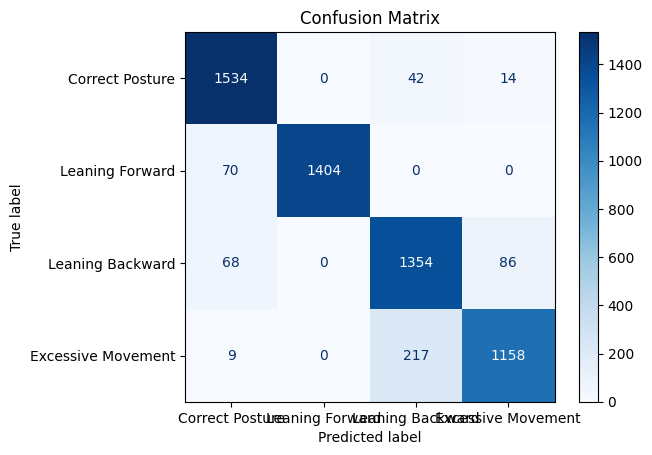

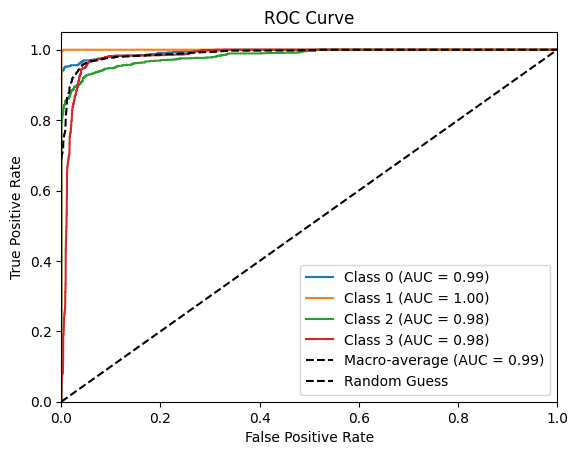

In [ ]:
# Define test dataset and dataloader
import os, glob

test_angle_files = sorted(glob.glob(f'{TEST_ANGLES}/*.npy'))
test_label_files = sorted(glob.glob(f'{TEST_LABELS}/*.npy'))

test_dataset = PostureDataset(test_angle_files, test_label_files)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# Load model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = '/content/drive/MyDrive/CapstoneDesign/train/checkpoint/100epochs.pth'

model = PostureClassifierRNN(input_size=15, hidden_size=64, num_layers=1, num_classes=4)
model.load_state_dict(torch.load(model_path, map_location=device))
model.to(device)

# Collect predictions, labels, and probabilities
all_predictions = []
all_labels = []
all_probabilities = []

model.eval()
with torch.no_grad():
    for inputs, labels, lengths in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs, lengths)
        probabilities = torch.softmax(outputs, dim=-1)
        _, predicted = torch.max(outputs, dim=2)

        for i in range(len(inputs)):
            valid_indices = lengths[i].item()
            all_predictions.extend(predicted[i][:valid_indices].cpu().numpy())
            all_labels.extend(labels[i][:valid_indices].cpu().numpy())
            all_probabilities.extend(probabilities[i][:valid_indices].cpu().numpy())

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)
all_probabilities = np.array(all_probabilities)

# Define class names
class_names = ["Correct Posture", "Leaning Forward", "Leaning Backward", "Excessive Movement"]

# Plot Confusion Matrix
plt.figure(figsize=(10, 15))
plot_confusion_matrix(all_labels, all_predictions, class_names)

# Plot ROC Curve
plot_roc_curve(all_labels, all_probabilities, num_classes=len(class_names))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1590
           1       1.00      0.95      0.98      1474
           2       0.84      0.90      0.87      1508
           3       0.92      0.84      0.88      1384

    accuracy                           0.92      5956
   macro avg       0.92      0.91      0.91      5956
weighted avg       0.92      0.92      0.92      5956



Text(95.7222222222222, 0.5, 'True Label')

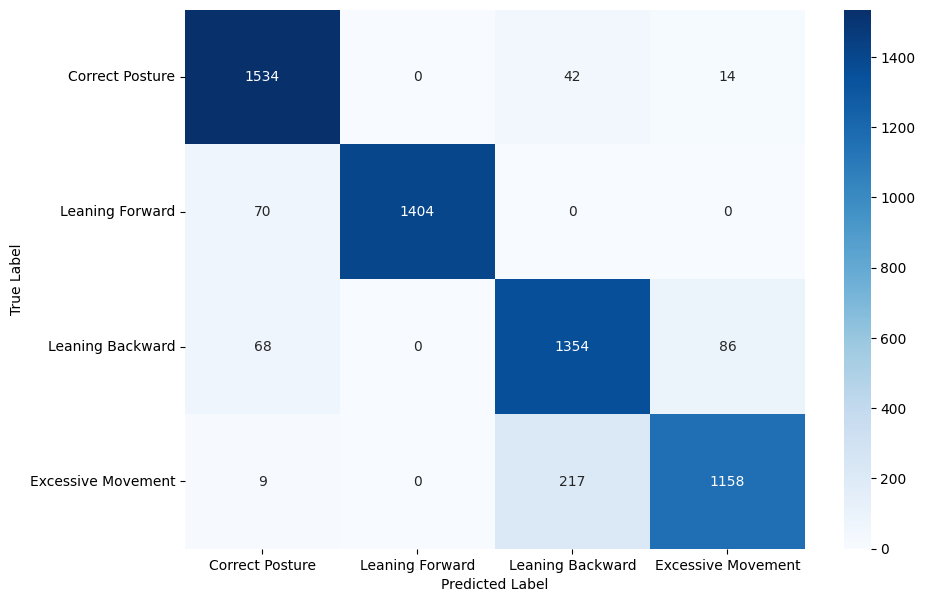

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print(classification_report(all_labels, all_predictions))

conf_matrix = confusion_matrix(all_labels, all_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt = 'd', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
# Infer poseture and render video
import os
import glob
import cv2
import numpy as np
import torch

label_mapping = {
    0: "Correct Posture",
    1: "Leaning Forward",
    2: "Leaning Backward",
    3: "Excessive Movement"
}

label_colors = {
    0: (0, 255, 0),  # Correct Posture -> Green
    1: (0, 0, 255),  # Leaning Forward -> Red
    2: (0, 0, 255),  # Leaning Backward -> Red
    3: (0, 0, 255)   # Excessive Movement -> Red
}

def render_video_with_posture(video_path, angles_data, predictions, output_path):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_idx = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or frame_idx >= len(predictions):
            break

        label = label_mapping[predictions[frame_idx]]
        color = label_colors[predictions[frame_idx]]

        cv2.putText(frame, f"Posture: {label}", (50, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)

        out.write(frame)
        frame_idx += 1

    cap.release()
    out.release()
    print(f"Rendered video saved at {output_path}")

def process_all_files(angles_folder, videos_folder, output_folder, model_path):
    angles_files = sorted(glob.glob(os.path.join(angles_folder, '*.npy')))
    videos_files = sorted(glob.glob(os.path.join(videos_folder, '*.mp4')))

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = PostureClassifierRNN(input_size=15)
    model.load_state_dict(torch.load(model_path))
    model.to(device)

    for angles_file, video_file in zip(angles_files, videos_files):
        video_name = os.path.basename(video_file)
        epoch_name = os.path.splitext(os.path.basename(model_path))[0]
        output_video_path = os.path.join(output_folder, f"{epoch_name}_{video_name}")

        angles_data = np.load(angles_file)

        predictions = predict(model, angles_data, device)

        render_video_with_posture(video_file, angles_data, predictions, output_video_path)

model_path = '/content/drive/MyDrive/CapstoneDesign/train/checkpoint/100epochs.pth'

process_all_files(TEST_ANGLES, TEST_VIDEOS, RPC, model_path)

<ipython-input-120-239cf552edd4>:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Rendered video saved at /content/drive/MyDrive/CapstoneDesign/test1/RPC/100epochs_0_0.mp4
Rendered video saved at /content/drive/MyDrive/CapstoneDesign/test1/RPC/100epochs_1_0.mp4
Rendered video saved at /content/drive/MyDrive/CapstoneDesign/test1/RPC/100epochs_2_0.mp4
Rendered video saved at /content/drive/MyDrive/CapstoneDesign/test1/RPC/100epochs_3_0.mp4
Rendered video saved at /content/drive/MyDrive/CapstoneDesign/test1/RPC/100epochs_merged_video.mp4
